<a href="https://colab.research.google.com/github/rcolo88/Machine-Learning-HW3/blob/main/Robert_Cologero_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
## Homework guideline
- The deadline is Nov 20th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline 
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Q1: K-means clustering (30pt)




In K-means, we are given dataset $\{\mathbf{x}^{(1)}, \dots,\mathbf{x}^{(N)} \}\subset \mathbb{R}^d$ and the number of clusters $K$, and we are trying to optimize the distortion value 
$$J = \sum_{i=1}^N\sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2$$
where $r_{ij}\in \{0,1\}$ is an indicator variable 
$r_{ij}=1 \text{ if and only if } \mathbf{x}^{(i)}\in \mathcal{C}_{j}$. For each $i$, there is one and only one $j$ such that $r_{ij}=1$, i.e., the membership for $\mathbf{x}^{(i)}$ is unique. 


---


### 1. Alternative optimization Steps (5pt)

Fix $\{\mu_j\}$ and minimize over $\{r_{ij}\}$, **show** the solution for $r_{ij}$ is 

$$r_{ij} = \begin{cases} 1 & \text{if } j= \text{arg}\min_k \|\mathbf{x}^{(i)}-\mu_k\|_2^2 \\ 0 & \text{Otherwise}\end{cases}$$
Please show your derivation. 


Fix $\{r_{ij}\}$ and minimize over $\{\mu_j\}$, **show** the solution for $\mu_j$ is  
$$\mu_j=\frac{\sum_i r_{ij}\mathbf{x}^{(i)}}{\sum_i r_{ij}}$$

Please show your derivation. 



## **Your Answer**: 
For the first part, we arrive at that being part of the cost funciton because after each iteration we get k centroids with respect to each cluster. All it is doing, is assigning a 1 if it is in the cluster already and 0 if not.

part 2:
\begin{equation}
\frac{\partial J}{\partial u_{j}} = \frac{\partial \sum_{j=1}^K r_{ij}\|\mathbf{x}^{(i)}-\mu_j\|_2^2}{\partial u_{j}}
\end{equation}

\begin{equation}
\frac{\partial J}{\partial u_{j}} = \frac{\partial \sum_{j=1}^K r_{ij}(x_i^Tx_i-2x_i^Tu_j+u_j^Tu_j)}{\partial u_{j}}
\end{equation}

\begin{equation}
\frac{\partial J}{\partial u_{j}} = -\sum_{i} r_{ij}2x_i+2u_j\sum_{i} r_{ij}=0
\end{equation}


K-means clustering can be applied to image compression. Let's explore this with the following image example.

(600, 394, 4)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


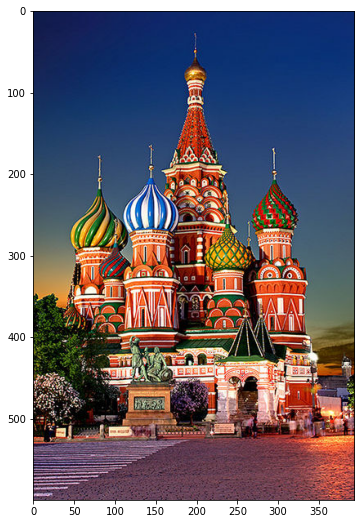

In [ ]:
img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW3/1-Saint-Basils-Cathedral.png?raw=true')
figure(figsize=(6,9))
imshow(img)
print(img.shape)

print(img[:,:,3])




---


### 2. Prepare data (5pt)
The `img` has the dimension of $600\times 394\times 4$, please reshape it to the matrix with the size of $236400\times 3$. Note the last column `img[:,:,3]` should be ignored since they are all ones. Then the number of features is 3 (which is RGB value) and number of samples of 236400. 

(600, 394, 3)
(600, 394, 3)


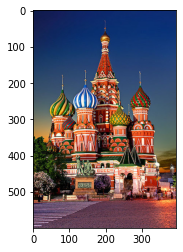

In [ ]:
 #@title  Q1.3 
 # your code starts here
 
img = img[:,:,:3]
print(img.shape)
imshow(img)
X = np.reshape(img,(236400,3))
print(img.shape)





---


### 3. Image compression with K-means (20pt)
Use $K=4, 8, 16$ to perform K-means algorithm and replace each row of the matrix `X` RGB value by its closest centroid RGB value. You need to reshape these three matrices back to the images with dimension $600\times 394\times 3$. Please use `imshow` to compare with these images. Please comment your results

In [ ]:
#n_clusters = [4,8,16]

def mykmeans(X, K, max_iter=100):
  # step 0
  centroids = X.copy()
  random.shuffle(centroids)
  centroids = centroids[:K]
  
  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    # step 3
    if sum(centroids-centroids_old) == 0.:
     # print('Number of iteration is ', i+1)
      break

  return centroids, closest, distortion_list



In [ ]:
def plot_kmeans(centroids, closest,X):
  X=X.copy()
  for i in range(236400):
    a = closest[i]
    X[i,:]=centroids[a]
  X = np.reshape(X,(600,394,3))
  figsize(6,9)
  imshow(X)


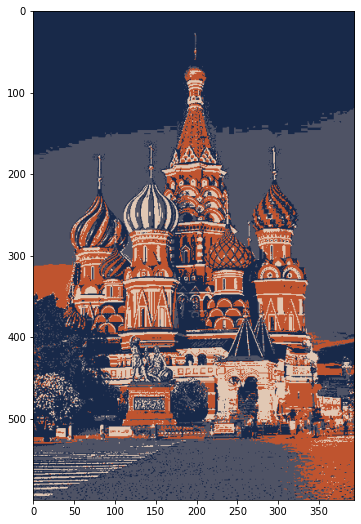

In [ ]:
centroids, closest, distortion_list = mykmeans(X,4)
plot_kmeans(centroids, closest,X)

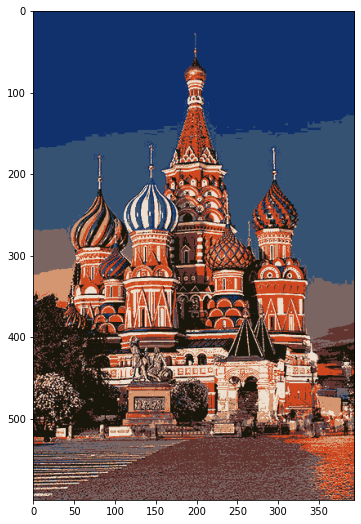

In [ ]:
centroids, closest, distortion_list = mykmeans(X,8)
plot_kmeans(centroids, closest,X)

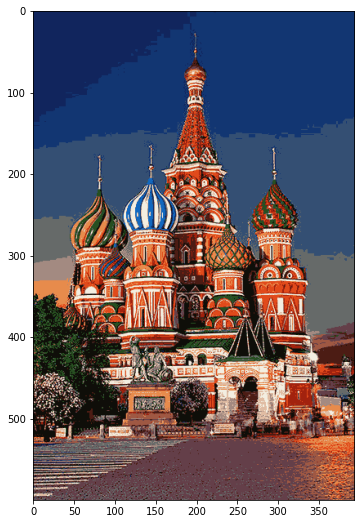

In [ ]:
centroids, closest, distortion_list = mykmeans(X,16)
plot_kmeans(centroids, closest,X)

# **Your Answer:**
There is change, but you can see how well it performs even when 4 is chosen. Overall very effective for image compression.



---


### 5. Compression rate (Optional)
What are the compression rates for these three images? Please find a way to estimate them. 

# **Your Answer:**



---


# Q2: Gaussian Mixture Models (40pt)



### 1. KL divergence (5pt)
In class, we defined the **Kullback-Leibler divergence** (or **KL divergence** for short) between two probability distributions $q$ and $p$, 
$$ \text{KL}(q||p)=\sum_{z=1}^K q(z) \log\left( \frac{q(z)}{p(z)}\right)$$
where $\sum_{z=1}^K q(z)=1$ and $\sum_{z=1}^K p(z)=1$. For simplicity, assume $p(z)>0$ for all $z$. 

Please show the following two key properties
- $\text{KL}(q||p)\ge 0$ 

- $\text{KL}(q||p)=0$ iff $p=q$. 

# **Your Answer:**
for: $\text{KL}(q||p)\ge 0$,
relative entropy is always nonnegative

secondly,
\begin{equation}
\sum_{i}p_ilog(\frac{q_i}{p_i}) \le log\sum_{i}p_i(\frac{q_i}{p_i})=log\sum_{i}q_i\le0
\end{equation}

since log is strictly concave, by Jensen's we have:
\begin{equation}
\frac{q_1}{p_1}=\frac{q_2}{p_2}= ... =\frac{q_n}{p_n}
\end{equation}

\begin{equation}
\sum_{i}q_i  = 1
\end{equation}

In [ ]:
 #@title  Q2.2 
 # your code starts here

In [ ]:
def log_likelihood(X,K,Pi_opt,Mu_opt, Sigma_opt):
  N,d  = X.shape
  outer = []
  for i in range(N):
    inner = []
    for c in range(K):
      #ex = (-.5*transpose(X[i]-Mu_opt[c])*(Sigma_opt[c]**-1)*(X[i]-Mu_opt[c]))
      #a = (1/(((2*pi)**d)*np.linalg.det(Sigma_opt[c]))**.5)*exp(ex)*Pi_opt[c]
      ex = (-.5*(((X[c]-Mu_opt[c]).T)).dot(inv(Sigma_opt[c])).dot((X[c]-Mu_opt[c])))
      a = (1/(((2*pi)**d)*np.linalg.det(Sigma_opt[c]))**.5)*exp(ex)*Pi_opt[c]
      inner.append(a)
    insum=sum(inner)
    outer.append(log(insum))
  out = sum(outer)

  return out

In [ ]:
def log_likelihood1(X,K,Pi_opt,Mu_opt, Sigma_opt):
  N,d  = X.shape
  outer = []
  for i in range(N):
    inner = []
    for c in range(K):
      #ex = (-.5*transpose(X[i]-Mu_opt[c])*(Sigma_opt[c]**-1)*(X[i]-Mu_opt[c]))
      #a = (1/(((2*pi)**d)*np.linalg.det(Sigma_opt[c]))**.5)*exp(ex)*Pi_opt[c]
      a = multivariate_normal.pdf(X[i],mean=Mu_opt[c], cov=Sigma_opt[c])*Pi_opt[c]
      inner.append(a)
    insum=sum(inner)
    outer.append(log(insum))
  out = sum(outer)

  return out




---


### 3. Construct a function to calculate Bayesian information criterion (BIC) (5pt)

In Gaussian mixture models, one question is how to choose the number of the cluster $K$. This time we cannot simply use elbow method, instead we will use slightly more complicated criterion, Bayesian information criterion (BIC). 

The formula for BIC in Gaussian mixture models is 
$$\text{BIC}(K) = ( K-1 + Kd+Kd(d+1)/2)\log(N) -\log(\hat\ell) $$

where 
- $d$ is the dimension of observation $\mathbf{x}$, 

- $N$ is the number of observation datapoint,

- $\hat\ell$ is the maximized value of the likelihood function of the model, which is the likelihood at the optimal paramter, $\ell(\theta^*)$. 

Note models with lower BIC are generally preferred. 

Please construct a function to calculate the Bayesian information criterion. 


In [ ]:
 #@title  Q2.3 
 # your code starts here
def BIC(K,d,N,ell_hat):
  n = log(N)
  out=(K-1+K*d+K*d*(d+1)/2)*n-ell_hat
  return out



---


### 4. Testing with the synthetic dataset (20pt)
Performing Gaussian mixture models over the loop for an increasing number of $K$ from 2 to 6. Note for each $K$, you should run your GMM several times with differnt random initial conditions, to make sure the parameter is not trapped in the local minimum. Plot BIC value vs. the number of the cluster $K$. From the plot, please comment what is the optimal $K$. 

(It is always a good habit to start your code for some special $K$, say $K=4$. Make sure your code produces the correct result first, then put it into the loop with different $K$. )

<Figure size 432x648 with 0 Axes>

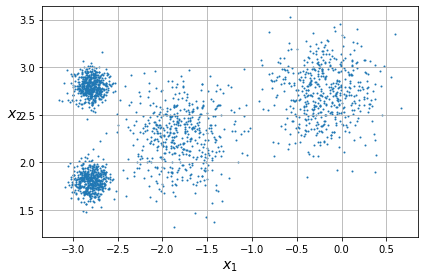

(2000, 2)


In [ ]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()  
    plt.show()     


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7) 

figure()
plot_clusters(X)
print(X.shape)       

In [ ]:
def euclidean_distance(x1, x2):
    return sqrt(sum((x1 - x2) ** 2))
    
# initialization for Kmeans++ algorithm
def initialize1(X, K):
    
    ## Step 1: initialize the centroids list and add
    ## a randomly selected data point to the list
    n_samples, n_features = X.shape
    random_sample_idxs = random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]

    ## compute remaining K - 1 centroids
    for c_id in range(K - 1):
        ## Step 2: initialize a list to store distances of data
        ## points from nearest centroid 
        ## compute distance of 'point' from each of the previously
        ## selected centroid and store the minimum distance
        dist = zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [euclidean_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

        ## Step 3: select data point with maximum distance as our next centroid  
        next_centroid = X[argmax(dist), :]
        centroids=vstack([centroids,next_centroid])

    return centroids


def mykmeans_plus(X, K, centroids, max_iter=100, plot_steps=False):
  
  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    if plot_steps:
      plot_kmeans(X,closest, centroids)

    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    if plot_steps:
      plot_kmeans(X,closest, centroids)
    # step 3
    if sum(centroids-centroids_old) == 0.:
      #print('Number of iteration is ', i+1)
      break
  
  
  return centroids, closest, distortion_list

In [ ]:
 #@title  Q2.4 
 # your code starts here
 from scipy.stats import multivariate_normal 

def multivariate_normal1(x, d, mean, covariance):
    #x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, mean).T.dot(mean)) / 2))


def initialize(X, K, centroids):
    # N has the number of rows while d has the number of columns of dataset X 
    N, d = X.shape 

    # initial weights given to each cluster are stored in phi or P(Zi=c)
    Pi = full(shape=K, fill_value=1/K) 

    # initial weights given to each data point wrt to each cluster or P(Zi=c|Xi)
    weights = full(shape=(N,K), fill_value=1/K)
        

    # initial value of mean of K Gaussians 
    Mu = [  centroids[i,:] for i in range(K) ] 

    # initial value of covariance matrix of K Gaussians
    Sigma = [ cov(X.T) for _ in range(K) ] 
    # theta =(Mu,Sigma,Pi)
    return Pi, Mu, Sigma, weights

# computer posterior probability of each data point wrt each cluster
# parameters are Pi, Mu, Sigma
def predict_posterior(X, K, Pi, Mu, Sigma):
    N = X.shape[0]
    n,d = X.shape
    # Creates a N*K matrix denoting probability of each point wrt each cluster 
    likelihood = zeros( (N, K) ) 
    for i in range(K):
        distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
            # pdf : probability denisty function
        likelihood[:,i] = distribution.pdf(X) 

    numerator = likelihood * Pi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


# E-Step: update weights holding Pi Mu Sigma constant
def e_step(X, K, Pi, Mu, Sigma):
    # updated weights(i,c)=P(Zi=c|Xi)
    weights   = predict_posterior(X, K, Pi, Mu, Sigma)
    return weights


# M-Step: update Mu, Sigma, Pi, holding weights constant
def m_step(X, K, weights):
    # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster Pi_c
    Pi_update = weights.mean(axis=0)  
    Mu_update = [[] for _ in range(K)]
    Sigma_update = [[] for _ in range(K)]
    for i in range(K):
        weight_i = weights[:, [i]]
        total_weight = weight_i.sum()
        Mu_update[i]    = (X * weight_i).sum(axis=0) / total_weight
        Sigma_update[i] = cov(X.T, aweights=(weight_i/total_weight).flatten(), bias=True)  

    return Pi_update, Mu_update, Sigma_update    
    
# predict function 
def predict(X, K, Pi, Mu, Sigma):
   weights = predict_posterior(X, K, Pi, Mu, Sigma)
   # datapoint belongs to cluster with maximum probability
   # returns this value
   return argmax(weights, axis=1)


def GMM_fit(X, K,centroids, max_iter=200, threshold =0.0001):
  # initialise parameters like weights, Pi, Mu, Sigma of all Gaussians in dataset X
  # step 1
  Pi, Mu, Sigma, weights = initialize(X,K,centroids)
  for j in range(max_iter):
    z = predict(X, K, Pi, Mu, Sigma)
    Mu_array = array(Mu)
    #plot_clusters(X, z, Mu_array)
    # step 2 iterate to update the value of P(Zi=c|Xi)
    weights = e_step(X, K, Pi, Mu, Sigma)
    Pi_old  = Pi;
    Mu_old  = Mu;
    # step 3 iterate to update the value of Mu, Sigma and Pi as the clusters shift
    Pi, Mu, Sigma  = m_step(X, K, weights)

    # for stopping 
    distances = [ norm(Mu[i] - Mu_old[i]) for i in range(K)] 
    #print(sum(distances))
    if sum(distances) < threshold:
      #print('Number of iteration is ', j+1)
      break

  z = predict(X, K, Pi, Mu, Sigma)
  Mu_array = array(Mu)
  #plot_clusters(X, z, Mu_array)

  return z, Pi, Mu, Sigma    


BIC for 2 is: 1233.990675625755
BIC for 3 is: 1392.128172131923
BIC for 4 is: 1437.8691490861643
BIC for 5 is: -2326.903542598132
BIC for 6 is: -1987.7734065217428


Text(0.5, 1.0, 'My created log likelihood')

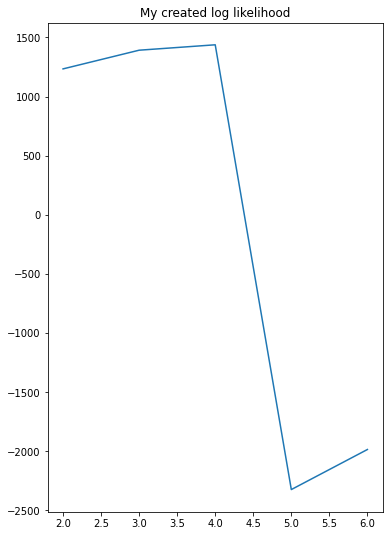

In [ ]:
k = [2,3,4,5,6]
xp = []
for i in k:
  N,d = X.shape
  centroids = initialize1(X,i)
  centroids, closest, distortion_list = mykmeans_plus(X,i,centroids)
  z, Pi, Mu, Sigma=GMM_fit(X, i,centroids)
  ll= log_likelihood(X,i,Pi,Mu,Sigma)
  final=BIC(i,d,N,ll)
  print('BIC for '+str(i)+' is: '+str(final))
  xp.append(final)
plot(k,xp)
plt.title('My created log likelihood')




BIC for 2 is: 2760.345042876957
BIC for 3 is: 2419.3286888413686
BIC for 4 is: 1536.7073009735795
BIC for 5 is: 1580.7830501248006
BIC for 6 is: 1620.8124506423294


Text(0.5, 1.0, 'SciPy multivariate normal')

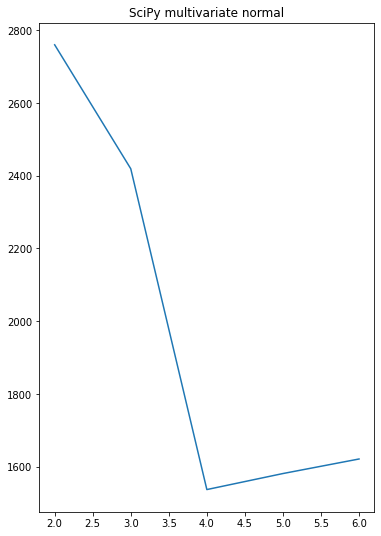

In [ ]:
xp1 = []
for i in k:
  N,d = X.shape
  centroids = initialize1(X,i)
  centroids, closest, distortion_list = mykmeans_plus(X,i,centroids)
  z, Pi, Mu, Sigma=GMM_fit(X, i,centroids)
  ll= log_likelihood1(X,i,Pi,Mu,Sigma)
  final=BIC(i,d,N,ll)
  print('BIC for '+str(i)+' is: '+str(final))
  xp1.append(final)
plot(k,xp1)
plt.title('SciPy multivariate normal')

In [ ]:
ex = (-.5*(((X[1]-Mu[1]).T)).dot(inv(Sigma[1])).dot((X[1]-Mu[1])))
a = (1/(((2*pi)**d)*np.linalg.det(Sigma[1]))**.5)*exp(ex)*Pi[1]
a

1.4053205465807975e-22

In [ ]:
multivariate_normal.pdf(X[1],mean=Mu[1], cov=Sigma[1])*Pi[1]


1.4053205465808177e-22

# **Your Answer:**
4 is the ideal k, however I could not achieve perfectly identical results so I plotted both for reference.



---


# Q3: Eigenfaces (30pt)

In this problem, we use PCA to reduce the dimension of raw face images. Here we load the data `face.mat` and we will have the variable `X` of size $(400, 112,92)$. Each image is in gray scale and has $112\times 92$ pixels. We will perform principle component analysis to this dataset.

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW3/face.mat?raw=true -O face.mat

In [ ]:
data = loadmat('face.mat')
X= data['X']
print(X.shape)
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(X[i], cmap='gray')



---


### 1. Prepare data (5pt)
You need to reshape each of the image into a row vector. So the data matrix should have the size of $400\times 10304$. 

In [ ]:
 #@title  Q3.1 
 # your code starts here
X = X.reshape(400,10304)
print(X.shape)



---


### 2. Principle component analysis (15pt)
Apply the principle component analysis on the dataset and **plot the singular values**. Please comment on your findings. Each eigenvector has the same dimensionality as the original images, and thus can itself be seen as an image. These eigenvectors (after reshaping into $112\times 92$ pixels) are therefore called **Eigenfaces**. Please **plot the first nine eigenfaces** which corresponding the top nine singular values. Comment on your findings. 


In [ ]:
 #@title  Q3.2 
 # your code starts here
X_mean = np.mean(X, axis=0)
X = X - X_mean
X_cov = cov(X.T)
eigenvalues, eigenvectors = eig(X_cov) # eigenvalues are not necessarily in decreasing order


V     = real(eigenvectors.T) # eigenvectors should be all real, but it has numerical error 
idxs = argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
V = V[idxs]
#scatter(arange(784), eigenvalues) #it shows X is approximately low rank

In [ ]:
components = V.T[:, 0 : 10304]
projected_X = X.dot(components).dot(components.T) + X_mean # you need to add the mean back to recover the image
projected_Xtr=reshape(projected_X , [400, 112,92])
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(projected_Xtr[i], cmap=pyplot.get_cmap('gray'))

# **Your Answer:**
The images appear near identical to each other.



---


### 3. Image compression (10pt)
Please use top 150 principle components (Eigenfaces) to reconstruct all 400 images. This compress the whole dataset at once. Pick any image after the compression and visualize it. Show the effect of PCA by
comparing the original image and the PCA images side by side using subplot. Comment on your findings. 

In [ ]:
 #@title  Q3.3
 # your code starts here
 components = V.T[:, 0 : 150] # choose top 150 PCs
projected_X = X.dot(components).dot(components.T) + X_mean # you need to add the mean back to recover the image
projected_Xtr=reshape(projected_X , [400, 112,92])

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs = axs.ravel()
for i in range(2): 
  axs[2*i].imshow(np.reshape(X,(400,112,92))[i], cmap=pyplot.get_cmap('gray')) #left one is the original picture
  axs[2*i+1].imshow(projected_Xtr[i], cmap=pyplot.get_cmap('gray')) # right one is the approximated one with top 150 PC.

# **Your Answer:**
The compressed images in the right have the same basis as the original but an almost "blurred" image is left from imposing and overlapping so many faces on top of each other.